 # **Import Libraries :**

In [90]:
import warnings
warnings.filterwarnings("ignore")

import copy 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

import joblib

# **Reading Data and store it in Variable :**

In [2]:
data=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

# **EDA :**

In [3]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Cabin is the most columns has NAN Values 
data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
C106           1
A19            1
D7             1
C118           1
E50            1
Name: count, Length: 147, dtype: int64

In [8]:
columns = [col for col in data.columns]

for col in columns:
    print("\n",data[col].value_counts(),"\n")


 PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
31     1
32     1
33     1
34     1
35     1
Name: count, Length: 891, dtype: int64 


 Survived
0    549
1    342
Name: count, dtype: int64 


 Pclass
3    491
1    216
2    184
Name: count, dtype: int64 


 Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64 


 Sex
male      577
female    314
Name: count, dty

In [9]:
columns = [col for col in data.columns if data[col].dtype == 'object']

for col in columns:
    print("\n",data[col].value_counts(),"\n")


 Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64 


 Sex
male      577
female    314
Name: count, dtype: int64 


 Ticket
1601         7
CA. 2343     7
347082       7
3101295      6
CA 2144      6
            ..
A/5 21172    1
349219       1
234818       1
345364       1
A/5 2466     1
Name: count, Length: 681, dtype: int64 


 Cabin
B96 B98        4
G6             4
C23 C2

In [10]:
data.duplicated().sum()

0

In [11]:
columns = [col for col in data.columns if data[col].dtype != 'object']

for col in columns:
    print("\n",col,data[col].skew().sum(),"\n")


 PassengerId 0.0 


 Survived 0.4785234382949897 


 Pclass -0.6305479068752845 


 Age 0.38910778230082704 


 SibSp 3.6953517271630565 


 Parch 2.7491170471010933 


 Fare 4.787316519674893 



# **EDA With Visualization :**

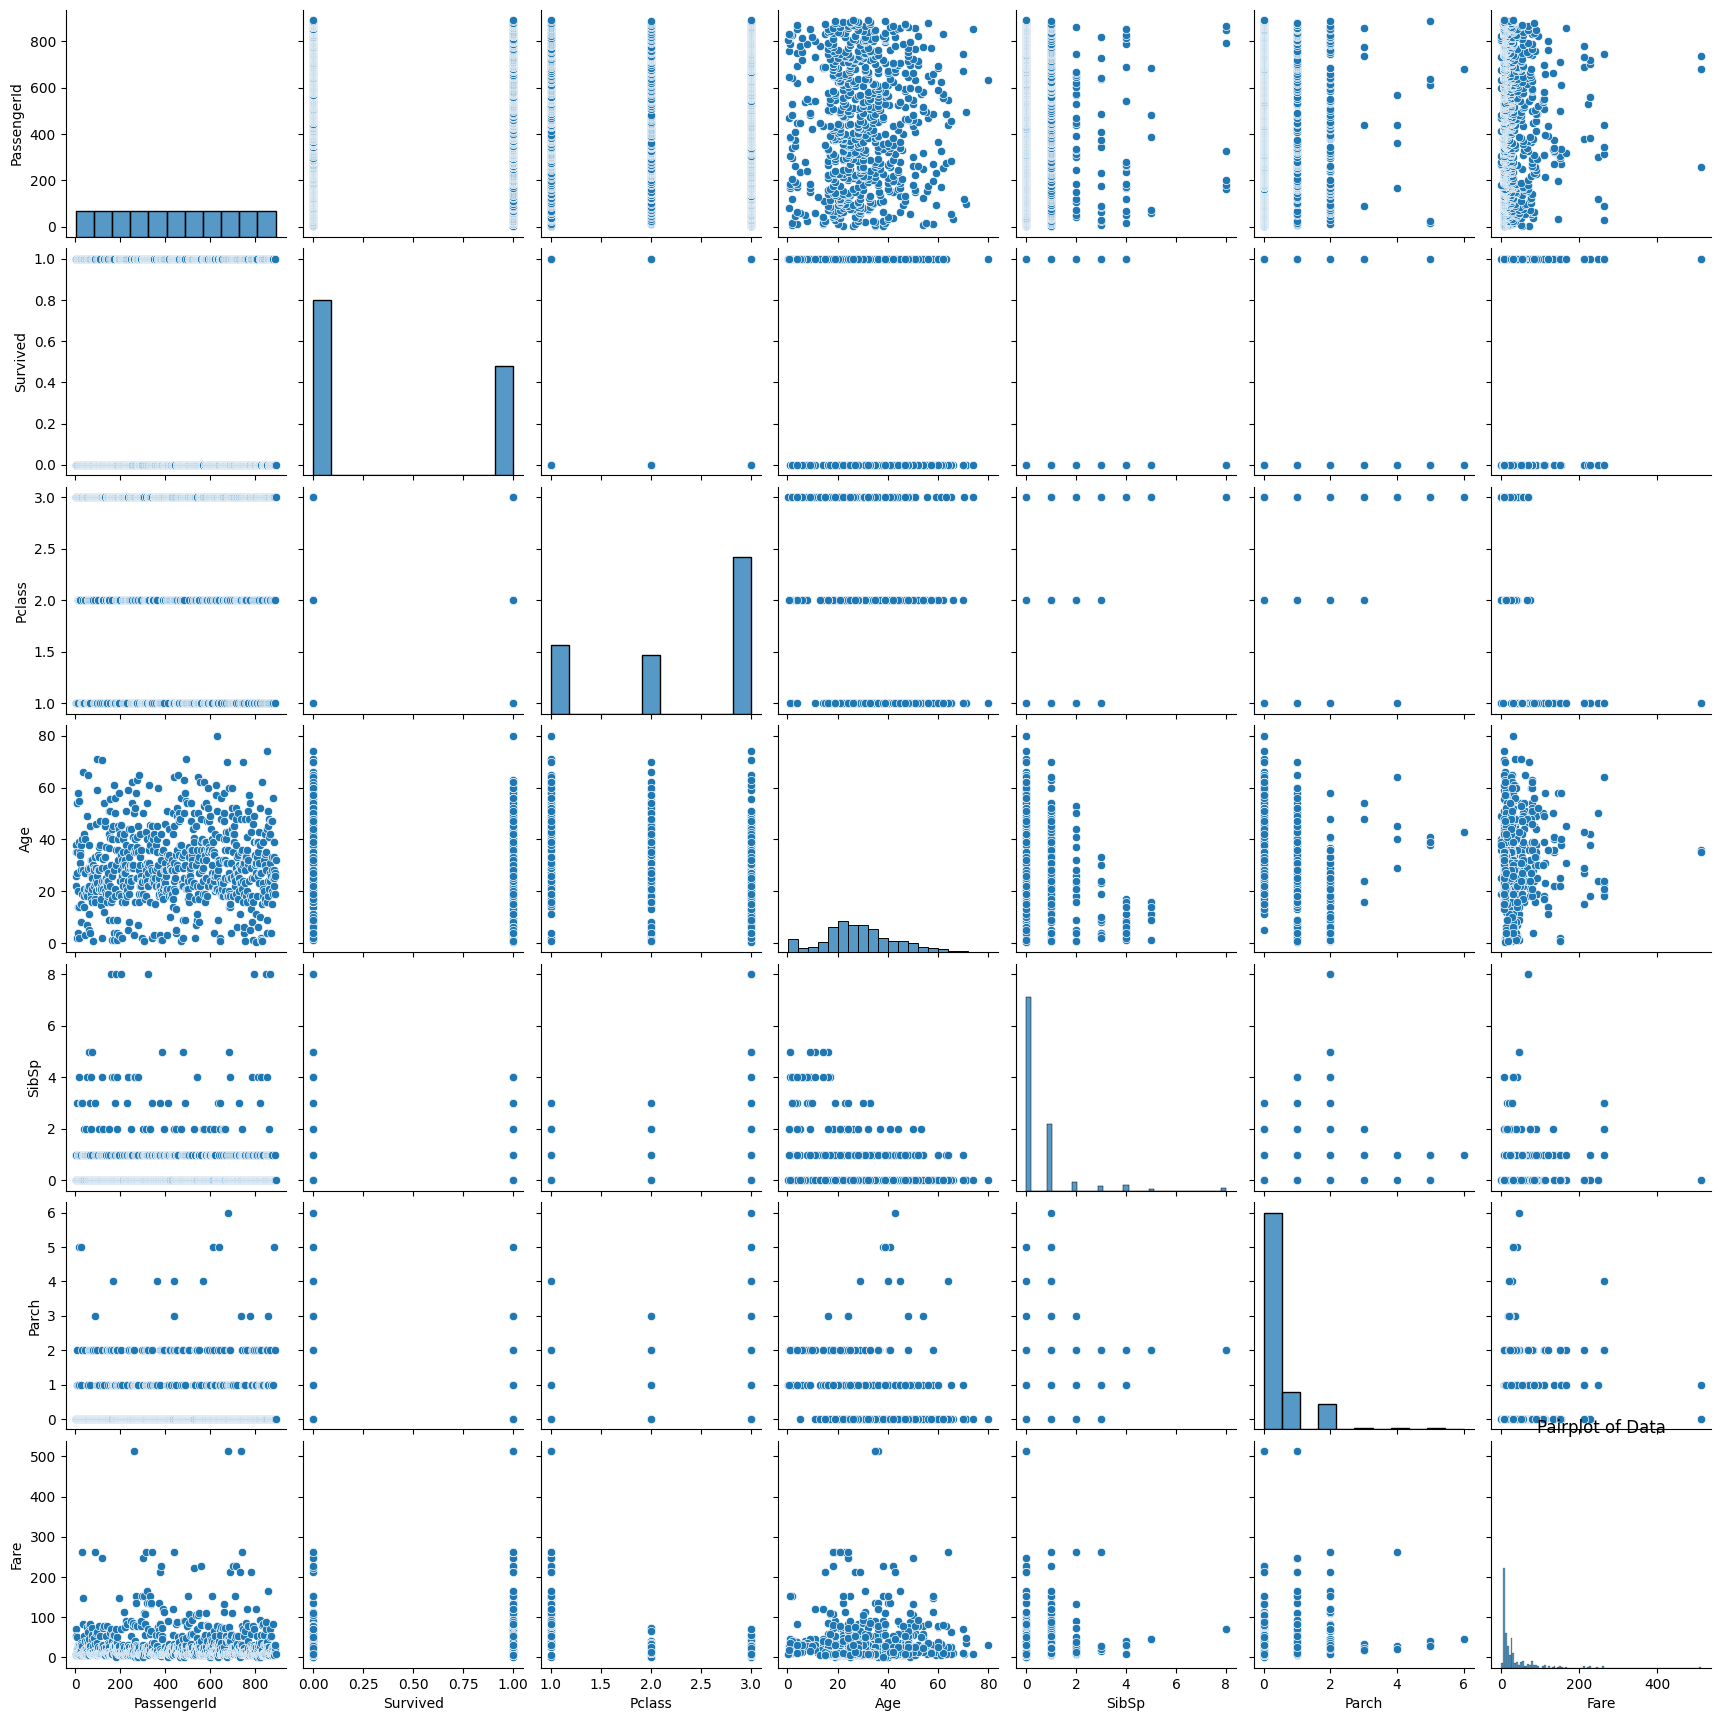

In [12]:
sns.pairplot(data)
plt.title('Pairplot of Data')
plt.show()

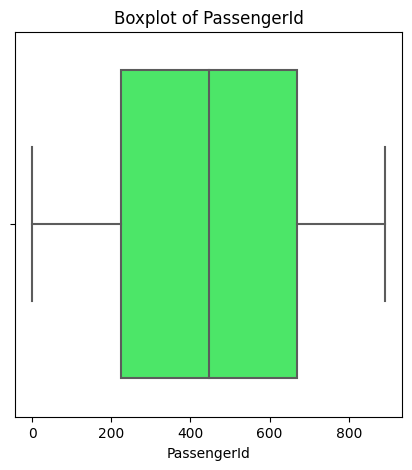

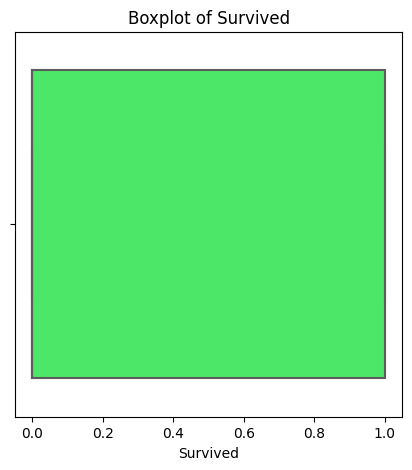

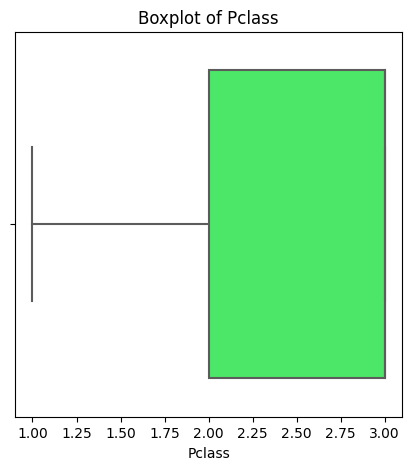

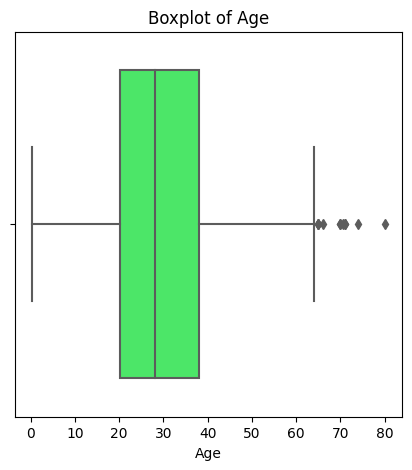

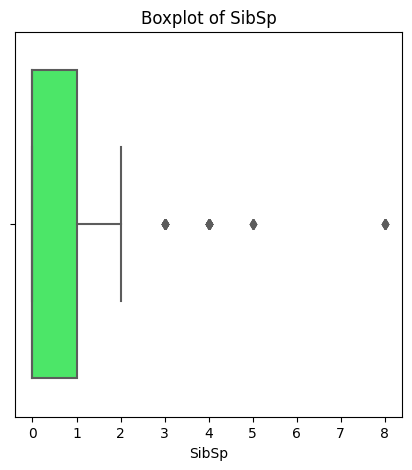

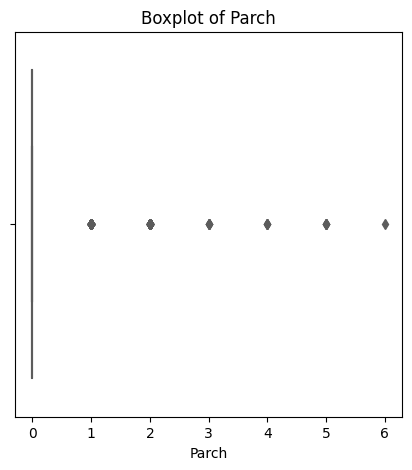

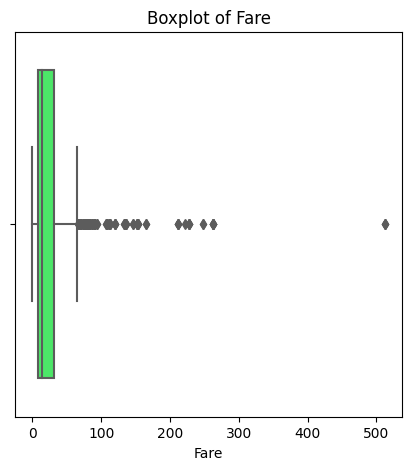

In [13]:
custom_palette = ["#33FF57"]

# To show the outliers of each column
for col in data.select_dtypes(include=['int', 'float']).columns:
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(f'Boxplot of {col}')
    bp = sns.boxplot(data=data, x=col, ax=ax, palette=custom_palette)
    plt.show()
    plt.close(fig)


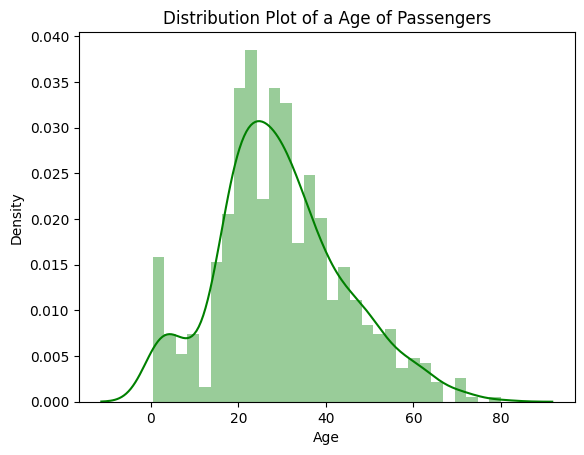

In [14]:
sns.distplot(data['Age'], kde=True, bins=30, color='green')
plt.title('Distribution Plot of a Age of Passengers')
plt.show()

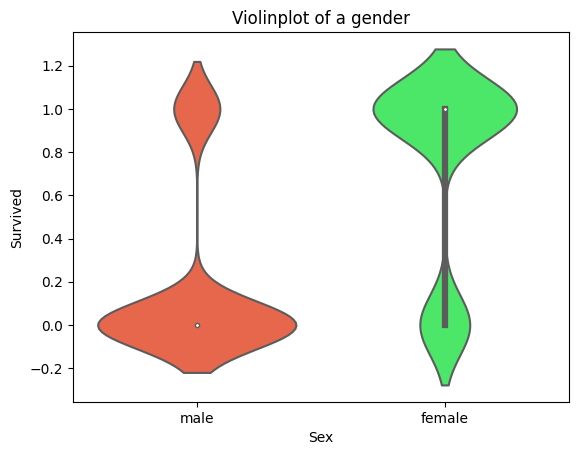

In [15]:
custom_palette = ["#FF5733", "#33FF57"]
sns.violinplot(x='Sex', y='Survived', data=data,palette=custom_palette)
plt.title('Violinplot of a gender')
plt.show()

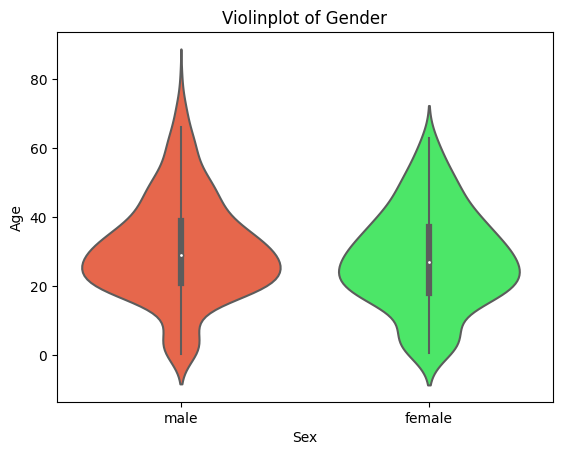

In [16]:
custom_palette = ["#FF5733", "#33FF57"]
sns.violinplot(x='Sex', y='Age', data=data, palette=custom_palette)
plt.title('Violinplot of Gender')
plt.show()

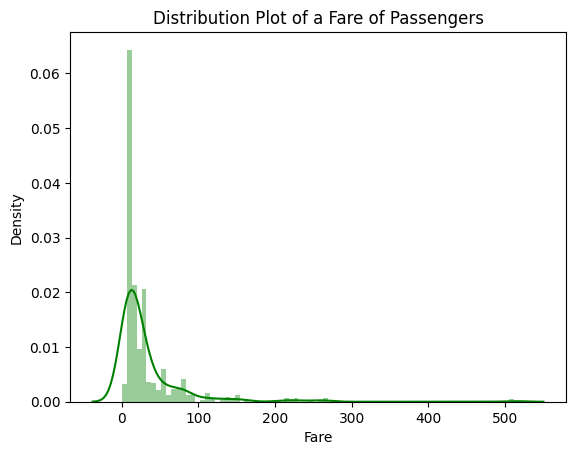

In [17]:
sns.distplot(data['Fare'], kde=True, bins=80, color='green')
plt.title('Distribution Plot of a Fare of Passengers')
plt.show()

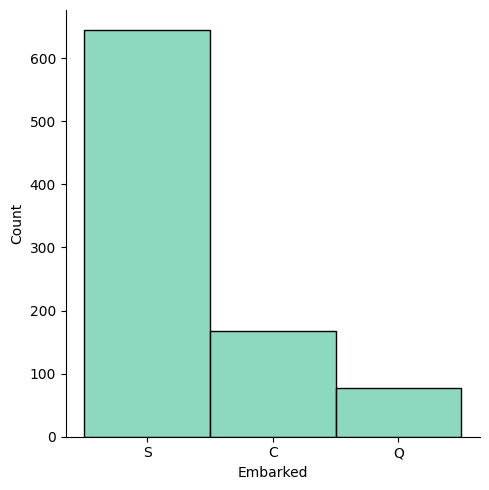

In [18]:
custom_palette = [ "#66CDAA"]  
sns.set_palette(custom_palette)
sns.displot(data=data, x="Embarked")

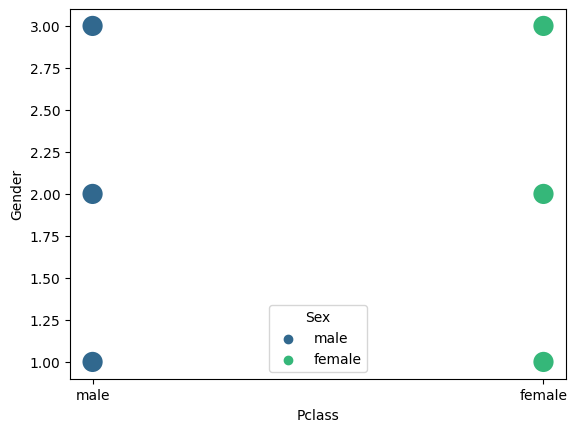

In [19]:
sns.scatterplot(data=data, x="Sex",y="Pclass", hue="Sex", palette="viridis",s=250)
plt.xlabel('Pclass')
plt.ylabel('Gender')
plt.show()

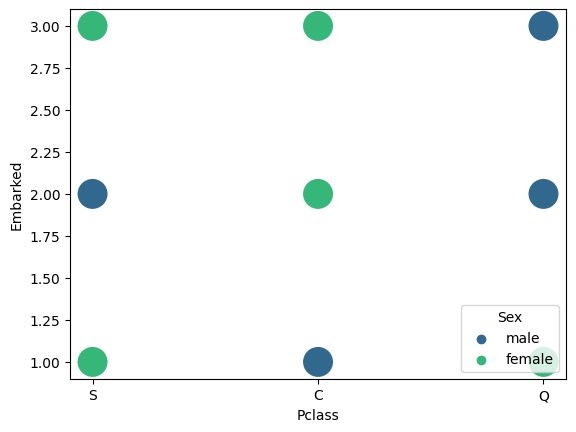

In [20]:
sns.scatterplot(data=data, x="Embarked",y="Pclass", hue="Sex", palette="viridis",s=550)
plt.xlabel('Pclass')
plt.ylabel('Embarked')
plt.show()

# **Preprocessing Operations :**

In [21]:
# Drop unuseful columns :
data.drop(columns=["Name","PassengerId"],axis=1,inplace=True)

In [22]:
data.Cabin.isna().sum()

687

In [23]:
# Drop Columns with big amount of missed data and null values 
data.drop(columns=["Cabin"],axis=1,inplace=True)

In [24]:
# Fill the missed data with the mean in the age column 
data["Age"] = data["Age"].fillna(np.mean(data["Age"]))


In [25]:
# Drop the records with missed data ; because there are only 2 records
data=data.dropna()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [27]:
# To know every column will be encoded and how will be encoded
columns = [col for col in data.columns if data[col].dtype == 'object']

for col in columns:
    print("\n",data[col].value_counts(),"\n")


 Sex
male      577
female    312
Name: count, dtype: int64 


 Ticket
CA. 2343     7
1601         7
347082       7
3101295      6
CA 2144      6
            ..
A/5 21172    1
349219       1
234818       1
345364       1
A/5 2466     1
Name: count, Length: 680, dtype: int64 


 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 



In [28]:
# Drop Ticket column because it has many values so it will be so hard to encode each value with label
data.drop("Ticket",axis=1,inplace=True)

## **Encoding Categorical Data :**

In [29]:
#Get dummies encoding
Get_Dumm=["Sex"]

for col in Get_Dumm :
    Encoded_with_getdummies=pd.get_dummies(data[col],drop_first=False,dtype="int")
    data=pd.concat([data,Encoded_with_getdummies],axis=1)
    data.drop(col,axis=1,inplace=True)

In [30]:
#Label Encoding 
Label_categ=["Embarked"]
for col in Label_categ :
    data[col]=LabelEncoder().fit_transform(data[col])

In [31]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.000000,1,0,7.2500,2,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0
2,1,3,26.000000,0,0,7.9250,2,1,0
3,1,1,35.000000,1,0,53.1000,2,1,0
4,0,3,35.000000,0,0,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,2,0,1
887,1,1,19.000000,0,0,30.0000,2,1,0
888,0,3,29.699118,1,2,23.4500,2,1,0
889,1,1,26.000000,0,0,30.0000,0,0,1


## **Scaling Numerical data :**

In [32]:
Scaled_Data=MinMaxScaler().fit_transform(data)

In [33]:
Scaled_Data

array([[0.        , 1.        , 0.27117366, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.4722292 , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.32143755, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.36792055, ..., 1.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.39683338, ..., 0.5       , 0.        ,
        1.        ]])

In [34]:
Scaled_Data=pd.DataFrame(Scaled_Data)

In [35]:
Scaled_Data

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,1.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,1.0,0.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,1.0,0.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
884,0.0,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
885,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,1.0,0.0
886,0.0,1.0,0.367921,0.125,0.333333,0.045771,1.0,1.0,0.0
887,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,0.0,1.0


In [36]:
Scaled_Data.columns=["Survived","Pclass","Age","SibSp","Parch","Fare","Embarked","female","male"]

In [37]:
Scaled_Data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,1.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,1.0,0.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,1.0,0.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
884,0.0,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
885,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,1.0,0.0
886,0.0,1.0,0.367921,0.125,0.333333,0.045771,1.0,1.0,0.0
887,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,0.0,1.0


## **Splitting Data into features and Goal Groups :**

In [95]:
Features=Scaled_Data.drop(columns="Survived")
Goal=Scaled_Data["Survived"]

## **Splitting Groups into train and test groups :**

In [96]:
Features_train,Features_test,Goal_train,Goal_test=train_test_split(Features,Goal,test_size=0.1,random_state=0)

## **Applying Grid Search Model :**

In [40]:
LR_params={"penalty":['l1', 'l2','elasticnet', 'None'],
           "dual":[True,False],
           "tol":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4,1e+5],
           "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

KNN_params={"n_neighbors":[3,4,5,6,7,8,9,10],
            "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
            "weights":["uniform","distance"],
            "leaf_size":[10,20,30,40,50]}

DTC_params={"max_leaf_nodes":[1,3,4,5,7,8,"None"],
            "random_state":[0,10,15,30,40,42,44,46,50,60],
            'max_depth' : [3,5,7,10],
            'criterion': ['gini', 'entropy']}

RFC_params={"n_estimators":[100,120,160,200,240],
            "criterion":['gini', 'entropy', 'log_loss'],
            "max_features":["sqrt","log2","None"],
            "bootstrap":[True,False]}

## Applying Grid Search on Logistic Regression model :

In [42]:
LR=LogisticRegression()
GRS = GridSearchCV(LR, LR_params, cv = 5)
GRS.fit(Features_train, Goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'dual': False, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.1}
0.8162499999999999


In [65]:
LR=LogisticRegression(dual=False,penalty="l2",solver="saga",tol=0.1)
LR.fit(Features_train,Goal_train)
LR_Pred=LR.predict(Features_test)
LR_Pred_Train=LR.predict(Features_train)

In [66]:
print("Classification Report for the test group : \n")
print(classification_report(Goal_test,LR_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Goal_train,LR_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74        53
         1.0       0.61      0.53      0.57        36

    accuracy                           0.67        89
   macro avg       0.66      0.65      0.65        89
weighted avg       0.67      0.67      0.67        89
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       496
         1.0       0.80      0.71      0.75       304

    accuracy                           0.82       800
   macro avg       0.82      0.80      0.81       800
weighted avg       0.82      0.82      0.82       800
 




[[41 12]
 [17 19]]


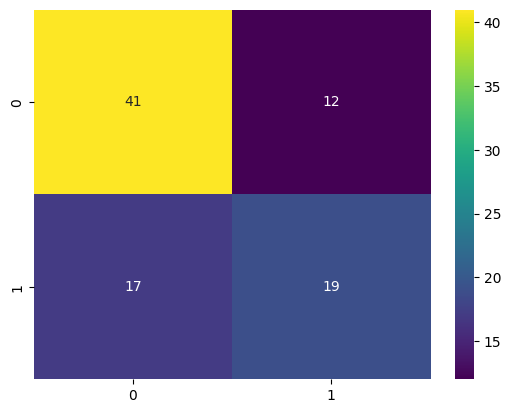

In [68]:
CM_RFC=confusion_matrix(Goal_test,LR_Pred)
print(CM_RFC)
sns.heatmap(CM_RFC,annot=True,cmap="viridis")
plt.show()

## Applying Grid Search on KNN model :

In [43]:
KNN=KNeighborsClassifier()
GRS = GridSearchCV(KNN, KNN_params, cv = 5)
GRS.fit(Features_train, Goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 8, 'weights': 'uniform'}
0.81375


In [46]:
KNN=KNeighborsClassifier(algorithm="auto",leaf_size=10,n_neighbors=8,weights="uniform")
KNN.fit(Features_train,Goal_train)
KNN_Pred=KNN.predict(Features_test)
KNN_Pred_Train=KNN.predict(Features_train)

In [48]:
print("Classification Report for the test group : \n")
print(classification_report(Goal_test,KNN_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Goal_train,KNN_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.76        53
         1.0       0.65      0.56      0.60        36

    accuracy                           0.70        89
   macro avg       0.68      0.67      0.68        89
weighted avg       0.69      0.70      0.69        89
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       496
         1.0       0.88      0.67      0.76       304

    accuracy                           0.84       800
   macro avg       0.85      0.81      0.82       800
weighted avg       0.85      0.84      0.84       800
 




[[42 11]
 [16 20]]


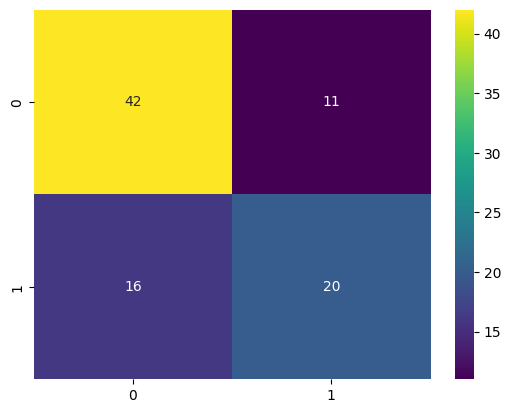

In [51]:
CM_KNN=confusion_matrix(Goal_test,KNN_Pred)
print(CM_KNN)
sns.heatmap(CM_KNN,annot=True,cmap="viridis")
plt.show()

## Applying Grid Search on Decision Tree model :

In [44]:
DTC=DecisionTreeClassifier()
GRS = GridSearchCV(DTC, DTC_params, cv = 5)
GRS.fit(Features_train, Goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 8, 'random_state': 0}
0.8237500000000001


In [84]:
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=2)
DTC.fit(Features_train, Goal_train)
DTC_Pred = DTC.predict(Features_test)
DTC_Pred_Train = DTC.predict(Features_train)


In [86]:
print("Classification Report for the test group : \n")
print(classification_report(Goal_test,DTC_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Goal_train,DTC_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78        53
         1.0       0.69      0.61      0.65        36

    accuracy                           0.73        89
   macro avg       0.72      0.71      0.71        89
weighted avg       0.73      0.73      0.73        89
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       496
         1.0       0.84      0.73      0.78       304

    accuracy                           0.85       800
   macro avg       0.85      0.82      0.83       800
weighted avg       0.85      0.85      0.84       800
 




[[43 10]
 [14 22]]


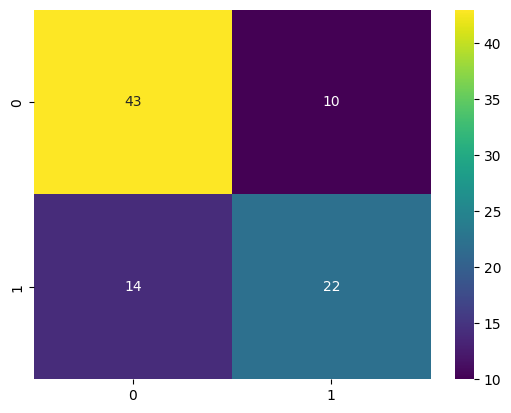

In [88]:
CM_DTC=confusion_matrix(Goal_test,DTC_Pred)
print(CM_DTC)
sns.heatmap(CM_DTC,annot=True,cmap="viridis")
plt.show()

## Applying Grid Search on Random Forest model :

In [45]:
RFC=RandomForestClassifier()
GRS = GridSearchCV(RFC, RFC_params, cv = 5)
GRS.fit(Features_train, Goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'log2', 'n_estimators': 120}
0.8237500000000001


In [97]:
RFC=RandomForestClassifier(bootstrap= True,class_weight='balanced_subsample', criterion="log_loss" ,max_features="log2",n_estimators= 120)
RFC.fit(Features_train,Goal_train)
RFC_Pred=RFC.predict(Features_test)
RFC_Pred_Train=RFC.predict(Features_train)

In [98]:
print("Classification Report for the test group : \n")
print(classification_report(Goal_test,RFC_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Goal_train,RFC_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        53
         1.0       0.72      0.72      0.72        36

    accuracy                           0.78        89
   macro avg       0.77      0.77      0.77        89
weighted avg       0.78      0.78      0.78        89
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       496
         1.0       0.99      0.96      0.98       304

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800
 




[[43 10]
 [10 26]]


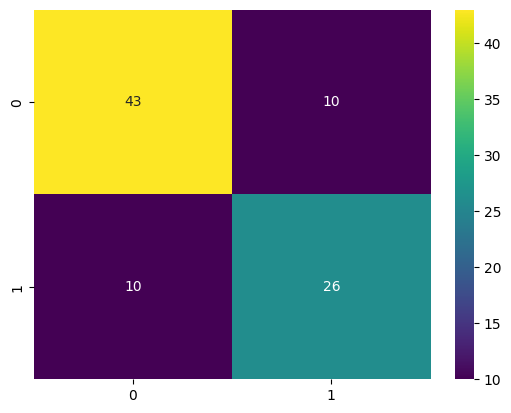

In [99]:
CM_RFC=confusion_matrix(Goal_test,RFC_Pred)
print(CM_RFC)
sns.heatmap(CM_RFC,annot=True,cmap="viridis")
plt.show()

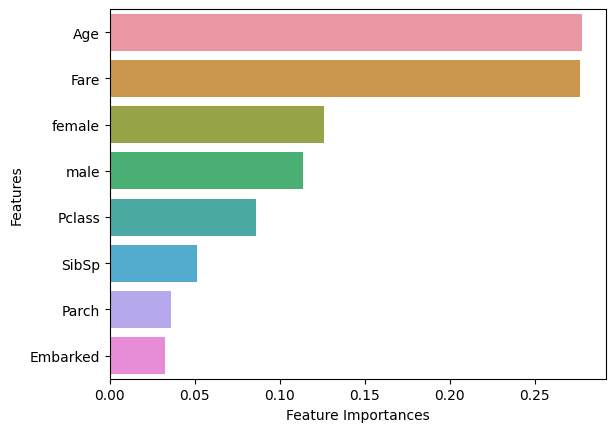

In [57]:
feature_scores = pd.Series(RFC.feature_importances_,
                          index = Features_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

In [59]:
Ftrain_RFC=Features_train.drop(columns=["Embarked","Parch"],axis=1)


RFC_ii=RandomForestClassifier()

RFC_Params = {
  "n_estimators":[50,100,200,300,400,500,600,700,800],
  "criterion":["gini","entropy", "log_loss"],
  "bootstrap":[True,False],
  "class_weight":["balanced","balanced_subsample"],
  "max_features":["sqrt","log2","None"]}

GRS=GridSearchCV(RFC,RFC_Params)
GRS.fit(Ftrain_RFC,Goal_train)

print(GRS.best_params_,"\n")
print(GRS.best_score_)

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50} 

0.83625


In [91]:
Ftest_RFC=Features_test.drop(columns=["Embarked","Parch"],axis=1)
RFC_ii=RandomForestClassifier(bootstrap= True,class_weight='balanced', criterion="gini" ,max_features="sqrt",n_estimators= 50)
RFC_ii.fit(Ftrain_RFC,Goal_train)
RFC_Pred=RFC.predict(Ftest_RFC)
RFC_Pred_Train=RFC.predict(Ftrain_RFC)

In [61]:
print("Classification Report for the test group : \n")
print(classification_report(Goal_test,RFC_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Goal_train,RFC_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78        53
         1.0       0.67      0.72      0.69        36

    accuracy                           0.74        89
   macro avg       0.73      0.74      0.74        89
weighted avg       0.75      0.74      0.74        89
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       496
         1.0       0.98      0.96      0.97       304

    accuracy                           0.98       800
   macro avg       0.98      0.97      0.98       800
weighted avg       0.98      0.98      0.98       800
 




[[40 13]
 [10 26]]


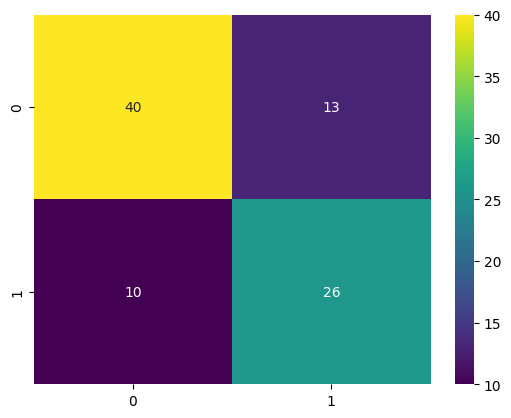

In [62]:
CM_RFC=confusion_matrix(Goal_test,RFC_Pred)
print(CM_RFC)
sns.heatmap(CM_RFC,annot=True,cmap="viridis")
plt.show()

## **Choose the final Model :**

In [ ]:
"""Based on the evaluation of various models, the Random Forest model, trained on the entire feature set, emerges as the 
most effective. It demonstrates a remarkable accuracy of 98% in predicting outcomes within the training dataset. 
Accompanying this high accuracy is an F1 score of 98%, reflecting the model's precision and recall performance metrics.Upon 
application to the testing dataset, the Random Forest model maintains a commendable accuracy rate of 78%, indicating its 
robustness in generalizing to unseen data. A meticulous examination of the confusion matrix further underscores the model's efficacy, as evidenced by the notable proportion of correctly predicted instances.
Specifically, the Random Forest model accurately predicts 69 out of 89 instances, yielding an impressive true positive rate. 
Conversely, only 20 instances are misclassified, reaffirming the model's overall proficiency in classification tasks."""

## **Saving Encoded And Scaled Data as CSV file :**

In [89]:
data.to_csv("Encoded_titanic_data.csv")
Scaled_Data.to_csv("Scaled_titanic_data.csv")   

## **Saving the model :**

In [100]:
joblib.dump(RFC,"Titanic Classifier Model (IEE Task).sav")

['Titanic Classifier Model (IEE Task).sav']